# 1) Initialization

In [1]:
!pip install folium -q

In [2]:
# Import the libraries
import pandas as pd
pd.options.display.max_rows = 500 
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
from IPython.display import IFrame
from IPython.display import display
from IPython.display import HTML, Image
import folium
from folium import Marker
from folium.plugins import MarkerCluster
pio.renderers.default = "iframe"

### 1.2) We gather the data

In [3]:
df = pd.read_csv("citibike_stations.csv")

# 2) Exploratory Data Analysis

### 2.1) Global dataset overview

In [4]:
#Shape of the dataset
print ("shape of the dataset :", df.shape)

shape of the dataset : (1000, 18)


In [5]:
print("The head of the dataset:")
display(df.head())

The head of the dataset:


,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,128,MacDougal St & Prince St,5687.04,40.727103,-74.002971,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01T00:00:00
1,224,Spruce St & Nassau St,5137.10,40.711464,-74.005524,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,True,True,True,False,1970-01-01T00:00:00
2,229,Great Jones St,5636.11,40.727434,-73.993790,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01T00:00:00
3,410,Suffolk St & Stanton St,5445.02,40.720664,-73.985180,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01T00:00:00
4,434,9 Ave & W 18 St,6190.08,40.743174,-74.003664,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01T00:00:00


In [6]:
print("The analytics description of the dataset:")
display(df.describe())

The analytics description of the dataset:


,station_id,latitude,longitude,region_id,capacity,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled
count,1000.000000,1000.000000,1000.000000,997.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3638.081000,40.764698,-73.948477,76.732197,25.232000,5.897000,1.034000,18.126000,0.239000
std,1052.779894,0.063003,0.041793,36.811763,10.594358,4.787621,2.669076,11.394295,3.740839
min,120.000000,40.637033,-74.086701,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3421.750000,40.708605,-73.974305,71.000000,19.000000,2.000000,0.000000,11.000000,0.000000
50%,3903.500000,40.764447,-73.940121,71.000000,23.000000,5.000000,1.000000,17.000000,0.000000
75%,4265.250000,40.820011,-73.915144,71.000000,29.000000,10.000000,1.000000,23.000000,0.000000
max,4683.000000,40.882260,-73.881876,311.000000,79.000000,16.000000,57.000000,77.000000,100.000000


In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   station_id                 1000 non-null   int64  
 1   name                       1000 non-null   object 
 2   short_name                 1000 non-null   object 
 3   latitude                   1000 non-null   float64
 4   longitude                  1000 non-null   float64
 5   region_id                  997 non-null    float64
 6   rental_methods             1000 non-null   object 
 7   capacity                   1000 non-null   int64  
 8   eightd_has_key_dispenser   1000 non-null   bool   
 9   num_bikes_available        1000 non-null   int64  
 10  num_bikes_disabled         1000 non-null   int64  
 11  num_docks_available        1000 non-null   int64  
 12  num_docks_disabled         1000 non-null   int64  
 13  is_installed               1000 non-null   bool  

None

In [8]:
df.isnull().sum()

station_id                   0
name                         0
short_name                   0
latitude                     0
longitude                    0
region_id                    3
rental_methods               0
capacity                     0
eightd_has_key_dispenser     0
num_bikes_available          0
num_bikes_disabled           0
num_docks_available          0
num_docks_disabled           0
is_installed                 0
is_renting                   0
is_returning                 0
eightd_has_available_keys    0
last_reported                0
dtype: int64

### 2.2) Cleaning the data

In [9]:
df.dropna(subset=['region_id'])

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,128,MacDougal St & Prince St,5687.04,40.727103,-74.002971,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01T00:00:00
1,224,Spruce St & Nassau St,5137.10,40.711464,-74.005524,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,True,True,True,False,1970-01-01T00:00:00
2,229,Great Jones St,5636.11,40.727434,-73.993790,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01T00:00:00
3,410,Suffolk St & Stanton St,5445.02,40.720664,-73.985180,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01T00:00:00
4,434,9 Ave & W 18 St,6190.08,40.743174,-74.003664,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4016,Adam Clayton Powell Blvd & W 130 St,7774.02,40.812346,-73.946168,71.0,"CREDITCARD,KEY",22,False,16,0,6,0,True,True,True,False,2021-11-09T00:00:00
996,3343,W 107 St & Columbus Ave,7619.05,40.799757,-73.962113,71.0,"CREDITCARD,KEY",23,False,16,1,6,0,True,True,True,False,2021-11-09T00:00:00
997,3774,Knickerbocker Ave & George St,4979.07,40.704425,-73.928360,71.0,"CREDITCARD,KEY",23,False,16,0,7,0,True,True,True,False,2021-11-08T00:00:00
998,4136,Washington Ave & E 163 St,7995.04,40.824000,-73.910890,71.0,"CREDITCARD,KEY",23,False,16,6,1,0,True,True,True,False,2021-11-09T00:00:00


In [10]:
df['last_reported']= pd.to_datetime(df['last_reported'], format="%Y/%m/%d", errors='coerce')

In [11]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   station_id                 1000 non-null   int64         
 1   name                       1000 non-null   object        
 2   short_name                 1000 non-null   object        
 3   latitude                   1000 non-null   float64       
 4   longitude                  1000 non-null   float64       
 5   region_id                  997 non-null    float64       
 6   rental_methods             1000 non-null   object        
 7   capacity                   1000 non-null   int64         
 8   eightd_has_key_dispenser   1000 non-null   bool          
 9   num_bikes_available        1000 non-null   int64         
 10  num_bikes_disabled         1000 non-null   int64         
 11  num_docks_available        1000 non-null   int64         
 12  num_doc

None

In [12]:
df.head(20)

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,128,MacDougal St & Prince St,5687.04,40.727103,-74.002971,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
1,224,Spruce St & Nassau St,5137.10,40.711464,-74.005524,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,True,True,True,False,1970-01-01
2,229,Great Jones St,5636.11,40.727434,-73.993790,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
3,410,Suffolk St & Stanton St,5445.02,40.720664,-73.985180,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
4,434,9 Ave & W 18 St,6190.08,40.743174,-74.003664,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
5,447,8 Ave & W 52 St,6816.07,40.763707,-73.985162,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
6,479,9 Ave & W 45 St,6717.06,40.760193,-73.991255,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
7,3050,Putnam Ave & Throop Ave,4392.04,40.685153,-73.941110,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,True,True,True,False,1970-01-01
8,3165,Central Park West & W 72 St,7141.07,40.775794,-73.976206,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,True,True,True,False,1970-01-01
9,3260,Mercer St & Bleecker St,5679.05,40.727064,-73.996621,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01


In [13]:
#The dataset was already very clean, no need for more processing !

# 3) EXPLORING THE DATA

In [14]:
print("The analytics description of the dataset:")
display(df.describe())

The analytics description of the dataset:


,station_id,latitude,longitude,region_id,capacity,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled
count,1000.000000,1000.000000,1000.000000,997.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3638.081000,40.764698,-73.948477,76.732197,25.232000,5.897000,1.034000,18.126000,0.239000
std,1052.779894,0.063003,0.041793,36.811763,10.594358,4.787621,2.669076,11.394295,3.740839
min,120.000000,40.637033,-74.086701,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3421.750000,40.708605,-73.974305,71.000000,19.000000,2.000000,0.000000,11.000000,0.000000
50%,3903.500000,40.764447,-73.940121,71.000000,23.000000,5.000000,1.000000,17.000000,0.000000
75%,4265.250000,40.820011,-73.915144,71.000000,29.000000,10.000000,1.000000,23.000000,0.000000
max,4683.000000,40.882260,-73.881876,311.000000,79.000000,16.000000,57.000000,77.000000,100.000000


- The number of station is 1000
- The average capacity per station is 25
- The average number of bikes available per station is 6
- The maximum capacity for a station if 79
- The minimum capacity for a station if 0

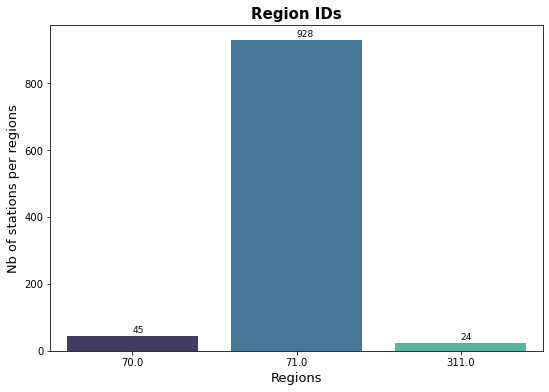

In [15]:
plt.figure(figsize=(30,6))

# first chart : Region ID
plt.subplot(131)
ax1 = sns.countplot(x = df["region_id"], palette='mako');
ax1.set_title("Region IDs", fontsize = 15, fontweight='bold')
ax1.set_ylabel("Nb of stations per regions", fontsize=13)
ax1.set_xlabel("Regions", fontsize=13)
for i in ax1.patches: 
    ax1.text(i.get_x() +0.40, i.get_height()+10,str(round((i.get_height()), 2)),fontsize = 9)


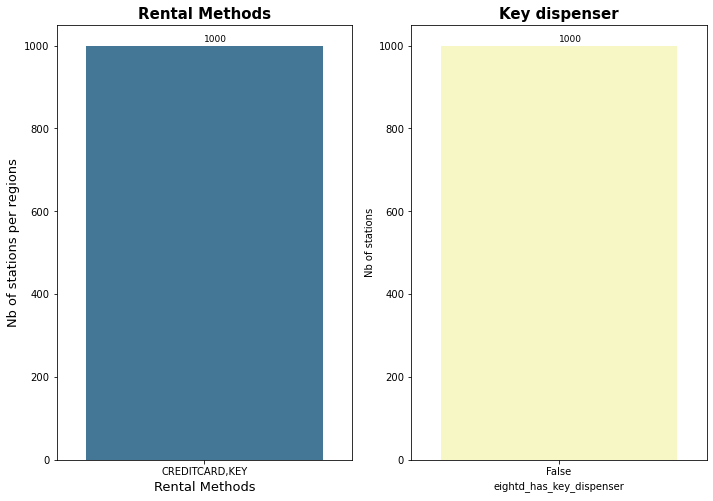

In [16]:
plt.figure(figsize=(18,8))

# first chart : Rental Method
plt.subplot(131)
ax1 = sns.countplot(x = df["rental_methods"], palette='mako');
ax1.set_title("Rental Methods", fontsize = 15, fontweight='bold')
ax1.set_ylabel("Nb of stations per regions", fontsize=13)
ax1.set_xlabel("Rental Methods", fontsize=13)
for i in ax1.patches: 
    ax1.text(i.get_x() +0.40, i.get_height()+10,str(round((i.get_height()), 2)),fontsize = 9)

# Second chart : Key dispenser
plt.subplot(132) 
ax2 = sns.countplot(x = df['eightd_has_key_dispenser'], palette='Spectral');
ax2.set_title("Key dispenser", fontsize = 15, fontweight='bold')
ax2.set_ylabel("Nb of stations")
for i in ax2.patches: 
    ax2.text(i.get_x() +0.40, i.get_height()+10,str(round((i.get_height()), 2)),fontsize = 9)

#### - They are 3 main regions covered in NYC :
- 71
- 70
- 311

#### - There is only two rental methods : 
- Creditcard/Key

#### But none of the stations seems to have a key dispenser 

In [17]:
#Load Map centered on NYC
station_map = folium.Map(location=[40.727103, -74.002971], zoom_start=11)

#Create a marker cluster
marker_cluster = MarkerCluster().add_to(station_map)

#Add a marker for each Station, add it to the cluster, not the map
for (index, row) in df.iterrows():
    folium.Marker(location=[row.loc['latitude'], row.loc['longitude']],
                  popup=row.loc['name'],
                  tooltip='Click for infos').add_to(marker_cluster)

#Save map
station_map.save("./station_map_clusters.html")
    
#Display Map
station_map

In [18]:
df.last_reported.value_counts(dropna=True)

2021-11-09    634
2021-11-08    333
1970-01-01     27
2021-11-07      2
2021-11-01      1
2021-09-20      1
2021-11-03      1
2021-11-06      1
Name: last_reported, dtype: int64

#### - 27 CitiBike stations have very old or wrong report dates and should be checked